# Prueba curso GeoPython - Nube Minera

**Profesor:** *Herber Hernández*

**Alumno:** *Daniel Eduardo Díaz Almeida*

**Instrucciones prueba curso geopython:**
	
	1  Leer el dataset de nombre «prueba_curso_geopython»
	2  Visualizar la variable en el plano, con respectivas etiquetas y mapa de colores.
	3  Obtener media, mediana, moda, varianza, desviación estándar, coeficiente de variación, factor de asimetría y curtosis de la variable de interés.
	4  Gráfico de derivas [x-variable], [y-variable].
	5  Graficar histograma simple, acumulado, cajas y bigotes.
	6  Obtener variograma (parámetros determinados de forma independiente por el estudiante) – [PyKrige].
	7  Crear grilla referente a los limites del modelo con celdas de tamaño seleccionadas por el estudiante.
	8  Generar una estimación mediante Kriging Ordinario, obteniendo además varianza de estimación.
	9  En una figura (matplotlib), crear 3 gráficos [muestras, estimación, varianza de estimación].

-------------------------------------------------------------------------------------------------------------------------------

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geostatspy.GSLIB as GSLIB # Utilidades GSLIB y funciones envueltas.
from mpl_toolkits.mplot3d import Axes3D
import geostatspy.geostats as geostats
#plt.style.use('ggplot')
%matplotlib inline

In [2]:
# cambio de directorio
os.chdir('C:/Users/DDA_CDEA/Desktop/Daniel_Eduardo/Excel-stuff_and_programming/Programming-exercises/Python_programming/Curso_geoPython/Unidad IV. Análisis Estructural/GSLIB_PYTHON')

In [3]:
folder = "C:/Users/DDA_CDEA/Desktop/Daniel_Eduardo/Excel-stuff_and_programming/Programming-exercises/Python_programming/Curso_geoPython/dataset_curso/"
file = "prueba_curso_geopython.txt"

df = pd.read_csv(folder + file, sep="\t", 
                 skiprows=[0,1,2,3,4,5,6,7,8,9], 
                 header=None,
                 names=["id sondaje","Este [X]","Norte [Y]","Cota [Z]","N° muestras","Ley Cu [%]"])
print( df.iloc[0:6,:] )
print( df.shape )

   id sondaje  Este [X]  Norte [Y]  Cota [Z]  N° muestras  Ley Cu [%]
0           1       200        200        75            1    0.113597
1           1       200        200        80            2    0.402376
2           1       200        200        85            3    0.738256
3           1       200        200        90            4    0.788436
4           1       200        200        95            5    0.774902
5           1       200        200       100            6    0.998138
(1080, 6)


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id sondaje,1080.0,45.500000,25.991194,1.000000,23.000000,45.50000,68.00000,90.00000
Este [X],1080.0,425.000000,143.680600,200.000000,300.000000,425.00000,550.00000,650.00000
Norte [Y],1080.0,400.000000,129.159255,200.000000,300.000000,400.00000,500.00000,600.00000
Cota [Z],1080.0,102.500000,17.268259,75.000000,88.750000,102.50000,116.25000,130.00000
N° muestras,1080.0,540.500000,311.913450,1.000000,270.750000,540.50000,810.25000,1080.00000
Ley Cu [%],1080.0,1.111156,0.487569,0.016985,0.760585,1.06118,1.41183,2.96329


In [5]:
np.isnan(df).any()

id sondaje     False
Este [X]       False
Norte [Y]      False
Cota [Z]       False
N° muestras    False
Ley Cu [%]     False
dtype: bool

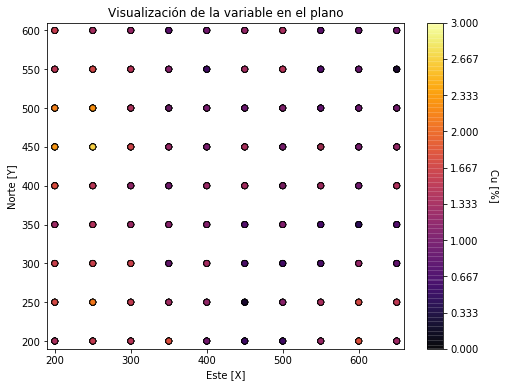

In [6]:
cmap = plt.cm.inferno
GSLIB.locmap(df, xcol="Este [X]",ycol="Norte [Y]",vcol="Ley Cu [%]",xmin=190,xmax=660,ymin=190,ymax=610,
             vmin=0,vmax=3,title="Visualización de la variable en el plano",
             xlabel="Este [X]",ylabel="Norte [Y]",vlabel="Cu [%]",cmap=cmap,fig_name="Var_")
plt.show()

## 3.- Cálculo de media, mediana, moda, varianza, desviación estándar, coeficiente de variación, factor de asimetría y curtosis de la variable de interés: *En este caso, la variable de interés en el dataset en estudio es la Ley de Cobre [%]*

In [7]:
# Media
avg = round( df["Ley Cu [%]"].mean(),2 )
print("La media de la Ley de Cobre es:", avg)
# Mediana
median = round( df["Ley Cu [%]"].median(), 2 )
print( "La mediana de la Ley de Cobre es:", median )
# Moda
mode = round( df["Ley Cu [%]"].mode(), 2 )
print( "La moda de la Ley de Cobre es:\n", mode )
# Varianza- Sill
sill = round( df["Ley Cu [%]"].var(), 2 )
print( "La varianza (sill del variograma) de la Ley de Cobre es:", sill )
# Desviación estándar
std_d = round( np.sqrt(df["Ley Cu [%]"].var()), 2 )
print( "La desviación estándar de la Ley de Cobre es:", std_d )
# coeficiente de variación
var_coef = round( std_d/df["Ley Cu [%]"].mean()*100, 2 )
print( "El coeficiente de variación de la Ley de Cobre es:", var_coef )
# Factor de simetría o skewness
skew = round( df["Ley Cu [%]"].skew(), 2 )
print("El factor de simetría de la Ley de Cobre es:", skew )
# Curtosis
kurt = round( df["Ley Cu [%]"].kurt(), 2 )
print("La curtosis de la Ley de Cobre es:", kurt )

La media de la Ley de Cobre es: 1.11
La mediana de la Ley de Cobre es: 1.06
La moda de la Ley de Cobre es:
 0    0.8
1    1.3
dtype: float64
La varianza (sill del variograma) de la Ley de Cobre es: 0.24
La desviación estándar de la Ley de Cobre es: 0.49
El coeficiente de variación de la Ley de Cobre es: 44.1
El factor de simetría de la Ley de Cobre es: 0.53
La curtosis de la Ley de Cobre es: 0.26


In [8]:
print( "La celda anterior se puede resumir en un dataframe que contenga las variables\n" )
stats_var = ["media", "mediana", "varianza","sd","coeff var","skewness","kurt", "moda"]
stats_val = [avg, median, sill, std_d, var_coef, skew, kurt, mode]
stats = pd.DataFrame( { "stats_var":stats_var, "stats_val":stats_val } )
print( stats.iloc[:] )

La celda anterior se puede resumir en un dataframe que contenga las variables

   stats_var                         stats_val
0      media                              1.11
1    mediana                              1.06
2   varianza                              0.24
3         sd                              0.49
4  coeff var                              44.1
5   skewness                              0.53
6       kurt                              0.26
7       moda  0    0.8
1    1.3
dtype: float64


## 4.- Gráfico de derivas [x-variable], [y-variable].

*Nos interesa conocer el comportamiento de la variable "Cu" a distintas distancias de los ejes mencionados.* **En nuestro caso, utilizando únicamente las librerias antes importadas, es que requerimos crear algunos DataFrames:**

In [9]:
# Matriz Este - Cu
df_new_x = pd.DataFrame( {"from":list(range(200,601,50)), "to":list(range(250,651,50)), "Cu [%]":np.nan} )
df_new_x.head( n = 9 )

,from,to,Cu [%]
0,200,250,NaN
1,250,300,NaN
2,300,350,NaN
3,350,400,NaN
4,400,450,NaN
5,450,500,NaN
6,500,550,NaN
7,550,600,NaN
8,600,650,NaN


Debemos calcular la ley media en cada una de las ventanas creadas (50 metros):

In [10]:
a = df[(df['Este [X]'] >= 200) & (df['Este [X]'] < 250)].mean() # Cu media entre 0 y <50 metros del eje X [ventana 1]
b = df[(df['Este [X]'] >= 250) & (df['Este [X]'] < 300)].mean()
c = df[(df['Este [X]'] >= 300) & (df['Este [X]'] < 350)].mean()
d = df[(df['Este [X]'] >= 350) & (df['Este [X]'] < 400)].mean()
e = df[(df['Este [X]'] >= 400) & (df['Este [X]'] < 450)].mean()
f = df[(df['Este [X]'] >= 450) & (df['Este [X]'] < 500)].mean()
g = df[(df['Este [X]'] >= 500) & (df['Este [X]'] < 550)].mean()
h = df[(df['Este [X]'] >= 550) & (df['Este [X]'] < 600)].mean()
i = df[(df['Este [X]'] >= 600) & (df['Este [X]'] < 650)].mean()
# las nx son las leyes medias de Cu para cada ventana del eje 'X', recordar que la longitud por ventana es de 50 m
ax = a["Ley Cu [%]"]
bx = b["Ley Cu [%]"]
cx = c["Ley Cu [%]"]
dx = d["Ley Cu [%]"]
ex = e["Ley Cu [%]"]
fx = f["Ley Cu [%]"]
gx = g["Ley Cu [%]"]
hx = h["Ley Cu [%]"]
ix = i["Ley Cu [%]"]
print("ax =",ax,'\n',"bx =",bx,'\n',"cx =",cx,'\n',"dx =",dx,'\n',"ex =",ex,'\n',"fx =",fx,'\n',"gx =",gx,'\n',"hx =",hx,'\n',"ix =",ix)

ax = 1.4728400092592593 
 bx = 1.5014024138888888 
 cx = 1.3322831388888896 
 dx = 1.2377657592592588 
 ex = 1.0948337111111113 
 fx = 0.8646881148148148 
 gx = 0.8044589407407409 
 hx = 0.8496130462962964 
 ix = 0.9363100648148147


Ahora pasaremos nuestras leyes al nuevo DataFrame y antes de graficar, crearemos una nueva columna con el promedio de "from - to":

In [11]:
df_new_x['Cu [%]'] = [ax, bx, cx, dx, ex, fx, gx, hx, ix]
df_new_x['promxy'] = df_new_x['to'] - 25
df_new_x.head(n=9)

,from,to,Cu [%],promxy
0,200,250,1.472840,225
1,250,300,1.501402,275
2,300,350,1.332283,325
3,350,400,1.237766,375
4,400,450,1.094834,425
5,450,500,0.864688,475
6,500,550,0.804459,525
7,550,600,0.849613,575
8,600,650,0.936310,625


Ahora, determinaremos la deriva correspondiente al Norte [Y] - Ley de Cobre [%]

In [12]:
# Matriz Norte - Cu
df_new_y = pd.DataFrame({"from":list(range(200,551,50)), "to":list(range(250,601,50)), "Cu [%]":np.nan})
df_new_y

,from,to,Cu [%]
0,200,250,NaN
1,250,300,NaN
2,300,350,NaN
3,350,400,NaN
4,400,450,NaN
5,450,500,NaN
6,500,550,NaN
7,550,600,NaN


In [13]:
a = df[(df['Norte [Y]'] >= 200) & (df['Norte [Y]'] < 250)].mean() # Cu media entre 0 y <50 metros del eje X [ventana 1]
b = df[(df['Norte [Y]'] >= 250) & (df['Norte [Y]'] < 300)].mean()
c = df[(df['Norte [Y]'] >= 300) & (df['Norte [Y]'] < 350)].mean()
d = df[(df['Norte [Y]'] >= 350) & (df['Norte [Y]'] < 400)].mean()
e = df[(df['Norte [Y]'] >= 400) & (df['Norte [Y]'] < 450)].mean()
f = df[(df['Norte [Y]'] >= 450) & (df['Norte [Y]'] < 500)].mean()
g = df[(df['Norte [Y]'] >= 500) & (df['Norte [Y]'] < 550)].mean()
h = df[(df['Norte [Y]'] >= 550) & (df['Norte [Y]'] < 600)].mean()
# las nx son las leyes medias de Cu para cada ventana del eje 'X', recordar que la longitud por ventana es de 50 m
ay = a["Ley Cu [%]"]
by = b["Ley Cu [%]"]
cy = c["Ley Cu [%]"]
dy = d["Ley Cu [%]"]
ey = e["Ley Cu [%]"]
fy = f["Ley Cu [%]"]
gy = g["Ley Cu [%]"]
hy = h["Ley Cu [%]"]
print("ay =",ay,'\n',"by =",by,'\n',"cy =",cy,'\n',"dy =",dy,'\n',"ey =",ey,'\n',"fy =",fy,'\n',"gy =",gy,'\n',"hy =",hy)

ay = 0.9768125833333331 
 by = 1.0797048224999999 
 cy = 1.0355179833333332 
 dy = 1.0227566583333338 
 ey = 1.1847504333333334 
 fy = 1.3243598083333332 
 gy = 1.265382091666666 
 hy = 1.1322722866666668


Al igual que lo hecho anteriormente, creamos una columna con el promedio de "from-to"

In [14]:
df_new_y['Cu [%]'] = [ay, by, cy, dy, ey, fy, gy, hy]
df_new_y['promxy'] = df_new_y['to'] - 25
df_new_y.head(n=8)

,from,to,Cu [%],promxy
0,200,250,0.976813,225
1,250,300,1.079705,275
2,300,350,1.035518,325
3,350,400,1.022757,375
4,400,450,1.184750,425
5,450,500,1.324360,475
6,500,550,1.265382,525
7,550,600,1.132272,575


**Gráfica la deriva [Este vs Cu] y [Norte vs Cu]**

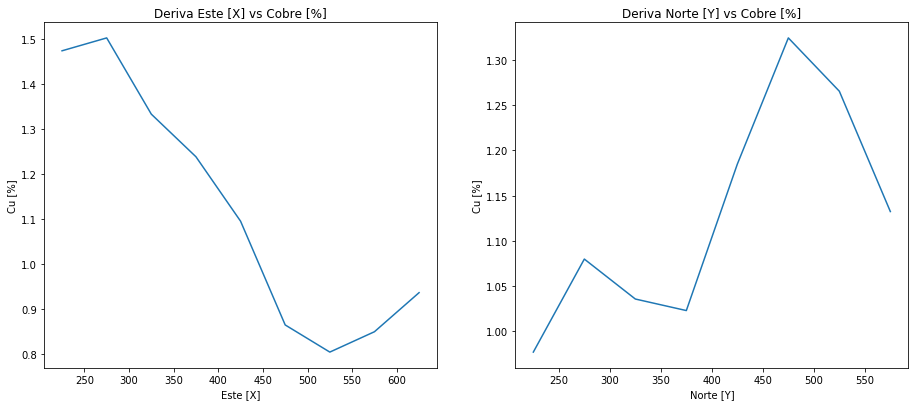

In [15]:
plt.subplot(121)

plt.plot(df_new_x['promxy'], df_new_x['Cu [%]'])
plt.xlabel('Este [X]'), plt.ylabel('Cu [%]')
plt.title('Deriva Este [X] vs Cobre [%]')

plt.subplot(122)

plt.plot(df_new_y['promxy'], df_new_y['Cu [%]'])
plt.xlabel('Norte [Y]'), plt.ylabel('Cu [%]')
plt.title('Deriva Norte [Y] vs Cobre [%]')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

## 5.- Gráfica de histograma simple, acumulado, cajas y bigotes.

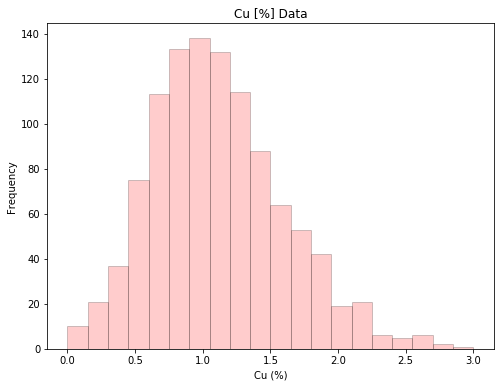

In [16]:
GSLIB.hist(df["Ley Cu [%]"],xmin=0.,xmax=3.,log=False,cumul=False,bins=20,weights=None,
     xlabel="Cu (%)",title="Cu [%] Data",fig_name="hist2")

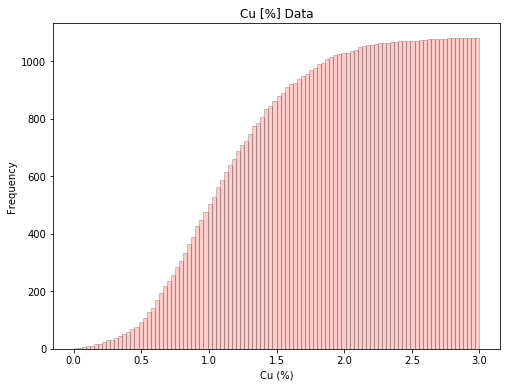

In [17]:
GSLIB.hist(df["Ley Cu [%]"],xmin=0.,xmax=3.,log=False,cumul=True,bins=100,weights=None,
     xlabel="Cu (%)",title="Cu [%] Data",fig_name="hist2")

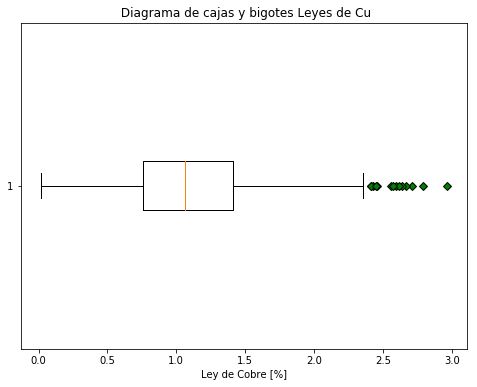

In [18]:
diamantes = dict(markerfacecolor = 'g', marker = 'D')
plt.figure(figsize=(8,6))
plt.boxplot(df["Ley Cu [%]"], vert = False,  flierprops = diamantes, showfliers = True)
plt.xlabel('Ley de Cobre [%]')
plt.title(' Diagrama de cajas y bigotes Leyes de Cu')
plt.show()

## 6.- Variograma – [PyKrige]

**Bibliotecas para el uso de PyKrige**

In [19]:
import pykrige
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

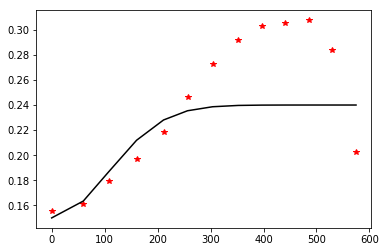

In [20]:
x = np.array(df["Este [X]"])
y = np.array(df["Norte [Y]"])
z = np.array(df["Cota [Z]"])
cu = np.array(df["Ley Cu [%]"])
Ordinary_Krig = OrdinaryKriging(x,y,cu,
                                variogram_model='gaussian',
                                nlags=13,
                                variogram_parameters={'sill':.24, 'range':260, 'nugget':0.15},
                                enable_plotting=True)

In [21]:
np.asarray(Ordinary_Krig)

array(<pykrige.ok.OrdinaryKriging object at 0x00000258B5487EB8>,
      dtype=object)

**Variograma Experimental**

In [22]:
var_cu = df["Ley Cu [%]"].var()
print( "The sill of Cu samples is:", round( var_cu, 3 ) )

The sill of Cu samples is: 0.238


In [23]:
GSLIB.gamv_2d

<function geostatspy.GSLIB.gamv_2d(df, xcol, ycol, vcol, nlag, lagdist, azi, atol, bstand)>

In [24]:
lagiso, cu_gammaiso, cu_npairiso = GSLIB.gamv_2d(df,"Este [X]",
                                           "Norte [Y]",
                                           "Ley Cu [%]",
                                           13,
                                           50.0,
                                           0,
                                           90,
                                           1)
lag90, cu_gamma90, cu_npair90 = GSLIB.gamv_2d(df,
                                              "Este [X]",
                                              "Norte [Y]",
                                              "Ley Cu [%]",
                                              13,
                                              50.0,
                                              90,
                                              0,
                                              1)
lag00, cu_gamma00, cu_npair00 = GSLIB.gamv_2d(df,"Este [X]",
                                           "Norte [Y]",
                                           "Ley Cu [%]",
                                           13,
                                           50.0,
                                           0,
                                           9999,
                                           1)

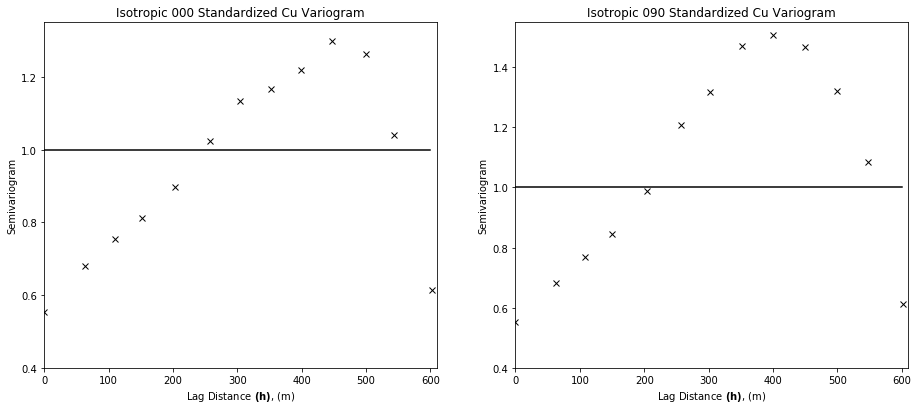

In [25]:
plt.subplot(121)

plt.plot(lag00,cu_gamma00,'x',color = 'black',label = 'Porosity')
plt.plot([0,600],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'), plt.ylabel('Semivariogram')
plt.title('Isotropic 000 Standardized Cu Variogram')
plt.xlim([0,610]), plt.ylim([.4,1.35])

plt.subplot(122)

plt.plot(lag90,cu_gamma90,'x',color = 'black',label = 'Porosity')
plt.plot([0,600],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'), plt.ylabel('Semivariogram')
plt.title('Isotropic 090 Standardized Cu Variogram')
plt.xlim([0,610]), plt.ylim([.4,1.55])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

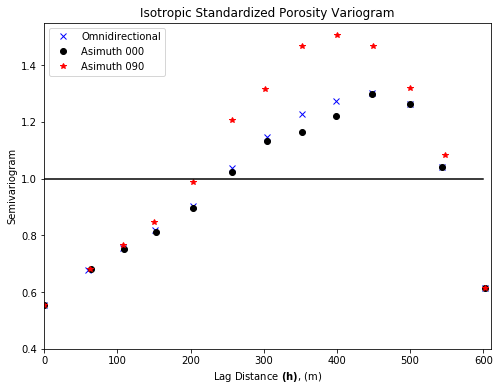

In [26]:
plt.figure(figsize=(8,6))
plt.plot(lagiso,cu_gammaiso,'x',color = 'blue',label = 'Omnidirectional')
plt.plot(lag00,cu_gamma00,'o',color = 'black',label = 'Asimuth 000')
plt.plot(lag90,cu_gamma90,'*',color = 'red',label = 'Asimuth 090')
plt.plot([0,600],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'), plt.ylabel('Semivariogram')
plt.title('Isotropic Standardized Porosity Variogram')
plt.xlim([0,610]), plt.ylim([0.4,1.55])
plt.legend(loc='upper left')
plt.show()

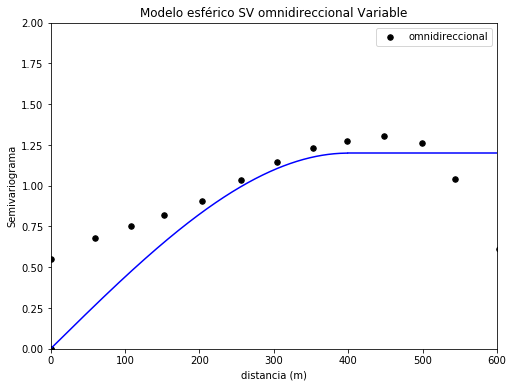

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(lagiso,cu_gammaiso,s=30,marker='o',color = 'black',label = 'omnidireccional')
plt.plot([400,600],[1.2,1.2],color = 'blue')

x = np.arange(0.0,400,1)
y = ((1.5*(x/400)) - (0.5*(x/400)**3))*1.2

plt.plot(x,y, color = 'blue')

plt.xlabel('distancia (m)')
plt.ylabel('Semivariograma')
plt.title('Modelo esférico SV omnidireccional Variable')
plt.ylim(0,2)
plt.xlim(0,600)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::], labels[::])

plt.show()

In [28]:
ncu, tvPor, tnsPor = geostats.nscore(df, "Ley Cu [%]") 
df["NCu"] = ncu
var = np.var(df["NCu"])
print('Normal Score Copper Variance = ',round(var,4))

Normal Score Copper Variance =  0.9987


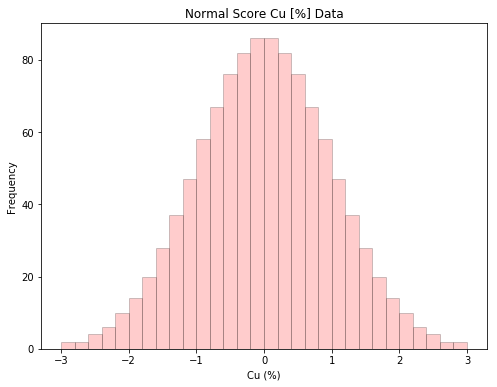

In [29]:
GSLIB.hist(df["NCu"],xmin=-3,xmax=3,log=False,cumul=False,bins=30,weights=None,
     xlabel="Cu (%)",title="Normal Score Cu [%] Data",fig_name="hist2")

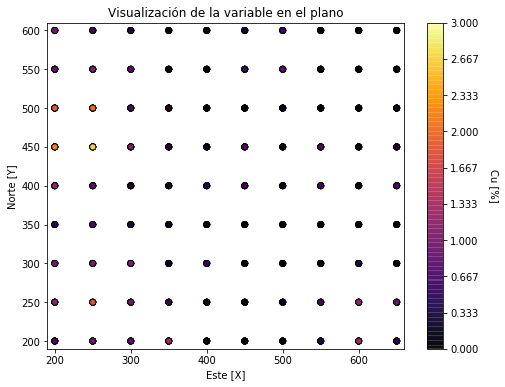

In [30]:
cmap = plt.cm.inferno
GSLIB.locmap(df, xcol="Este [X]",ycol="Norte [Y]",vcol="NCu",xmin=190,xmax=660,ymin=190,ymax=610,
             vmin=0,vmax=3,title="Visualización de la variable en el plano",
             xlabel="Este [X]",ylabel="Norte [Y]",vlabel="Cu [%]",cmap=cmap,fig_name="Var_")
plt.show()

In [31]:
geostats.gamv

<function geostatspy.geostats.gamv(df, xcol, ycol, vcol, tmin, tmax, xlag, xltol, nlag, azm, atol, bandwh, isill)>

In [32]:
Nlag0, Ncu_gamma0, Ncu_npair0 = geostats.gamv( df,"Este [X]","Norte [Y]","NCu", -9999, 9999, 50.0, 25.0, 13, 0, 90, 9999.9, 0 )
Nlag90, Ncu_gamma90, Ncu_npair90 = geostats.gamv( df,"Este [X]","Norte [Y]","NCu", -9999, 9999, 50.0, 25.0, 13, 90, 0, 9999.9, 0 )

In [33]:
np.min(Ncu_npair0)

0.0

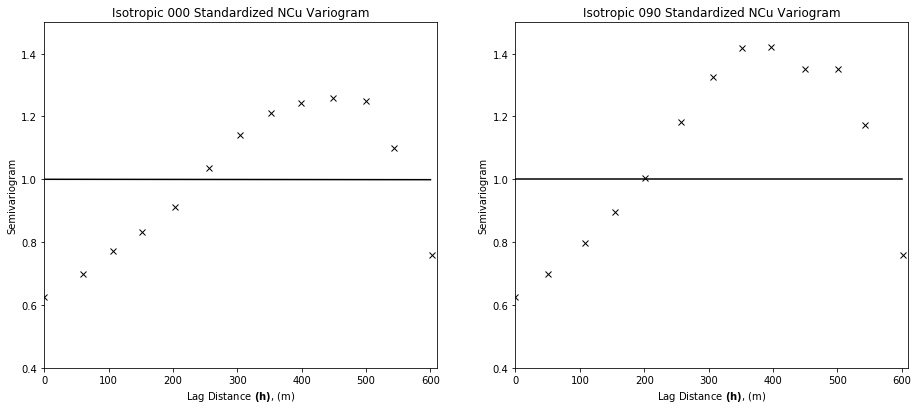

In [34]:
plt.subplot(121)

plt.plot(Nlag0,Ncu_gamma0,'x',color = 'black',label = 'Porosity')
plt.plot([0,600],[1.0,var],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'), plt.ylabel('Semivariogram')
plt.title('Isotropic 000 Standardized NCu Variogram')
plt.xlim([0,610]), plt.ylim([.4,1.50])

plt.subplot(122)

plt.plot(Nlag90,Ncu_gamma90,'x',color = 'black',label = 'Porosity')
plt.plot([0,600],[1.0,1.0],color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'), plt.ylabel('Semivariogram')
plt.title('Isotropic 090 Standardized NCu Variogram')
plt.xlim([0,610]), plt.ylim([0.4,1.50])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

We will assume these models will be applied in sequential Gaussian simulation; therefore, we must model to the sill or the global distribution will not be reproduced over the realizations. We will also not use cyclicity for now, as we are just getting started. Let's build a reasonable model to the sill.
Here's my model:

    p
    nug = 0.0; nst = 2
    it1 = 1; cc1 = 0.6; azi1 = 00; hmaj1 = 350; hmin1 = 350
    it2 = 1; cc2 = 0.4; azi2 = 90; hmaj2 = 9999.9; hmin2 = 400
    
  + nug - nugget effect contribution to sill
  + nst - number of nested structures (1 or 2)
  + it - type for this nested structure (1 - spherical, 2 - exponential, 3 - Gaussian)
  + cc - contribution of each nested structure (contributions + nugget must sum to the sill)
  + azi - the azimuth for this nested structure of the major direction, the minor is orthogonal
  + hmaj - the range for this nested structure in the major direction
  + hmin - the range for this nested structure in the minor direction

We have 2 structures and no nugget effect. We needed the 2nd structure to capture the zonal anisotropy in the 090 direction. Let's calculate the variogram model in these directions and plot them with the experimental variograms.

In [35]:
nug = 0.0; nst = 2
it1 = 3; cc1 = 1.0; azi1 = 0; hmaj1 = 190; hmin1 = 190 # horizontal mayor direction: larger x range, hmin: shorter x range
it2 = 3; cc2 = 0.0; azi2 = 90; hmaj2 = 200; hmin2 = 200

In [36]:
GSLIB.make_variogram

<function geostatspy.GSLIB.make_variogram(nug, nst, it1, cc1, azi1, hmaj1, hmin1, it2=1, cc2=0, azi2=0, hmaj2=0, hmin2=0)>

In [37]:
vario = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2,cc2,azi2,hmaj2,hmin2)
nlag = 13; xlag = 50; azm = 90; 
index0, h0, gam0, cov0, ro0 = geostats.vmodel(nlag,xlag,azm,vario)

azm = 0
index90, h90, gam90, cov90, ro90 = geostats.vmodel(nlag,xlag,azm,vario)

 x,y,z offsets = 50.0,8.97448257460403e-08
 x,y,z offsets = 0.0,50.0


In [38]:
gam0.shape

(14,)

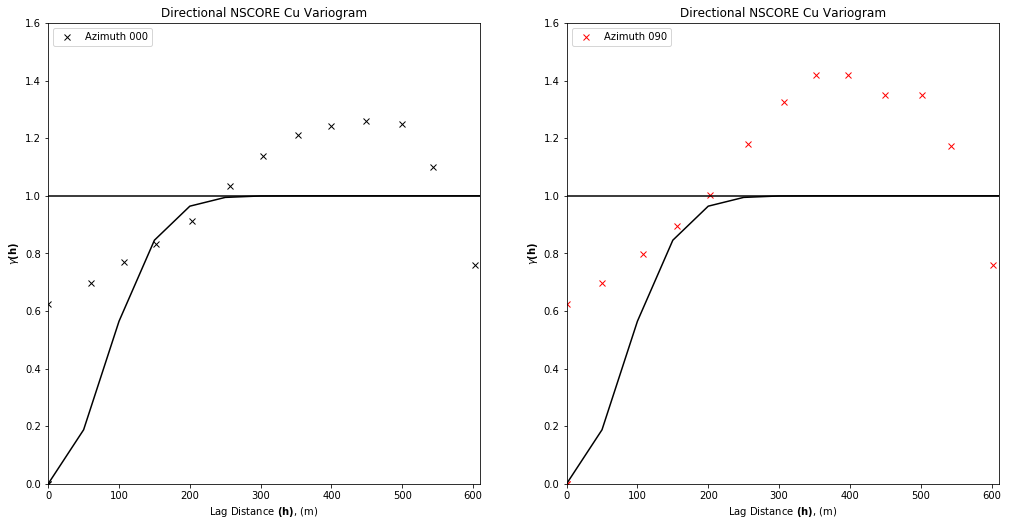

In [39]:
plt.subplot(1,2,1)
plt.plot(Nlag0,Ncu_gamma0,'x',color = 'black',label = 'Azimuth 000' )
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.plot(h0,gam0,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Cu Variogram')
plt.xlim([0,610])
plt.ylim([0,1.6])
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(Nlag90,Ncu_gamma90,'x',color = 'red',label = 'Azimuth 090')
plt.plot([0,2000],[1.0,1.0],color = 'black')
plt.plot(h90,gam90,color = 'black')
plt.xlabel(r'Lag Distance $\bf(h)$, (m)')
plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Directional NSCORE Cu Variogram')
plt.xlim([0,610])
plt.ylim([0,1.6])
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

In [40]:
lag,gamma=geostats.varmapv(df,
                      xcol="Este [X]",
                      ycol="Norte [Y]",
                      vcol="NCu",
                      tmin=-99999,
                      tmax=99999,
                      nxlag=8,
                      nylag=8,
                      dxlag=50,
                      dylag=50,
                      minnp=1,
                      isill=1)
gamma = np.asarray(gamma); vmap = np.asarray(lag);

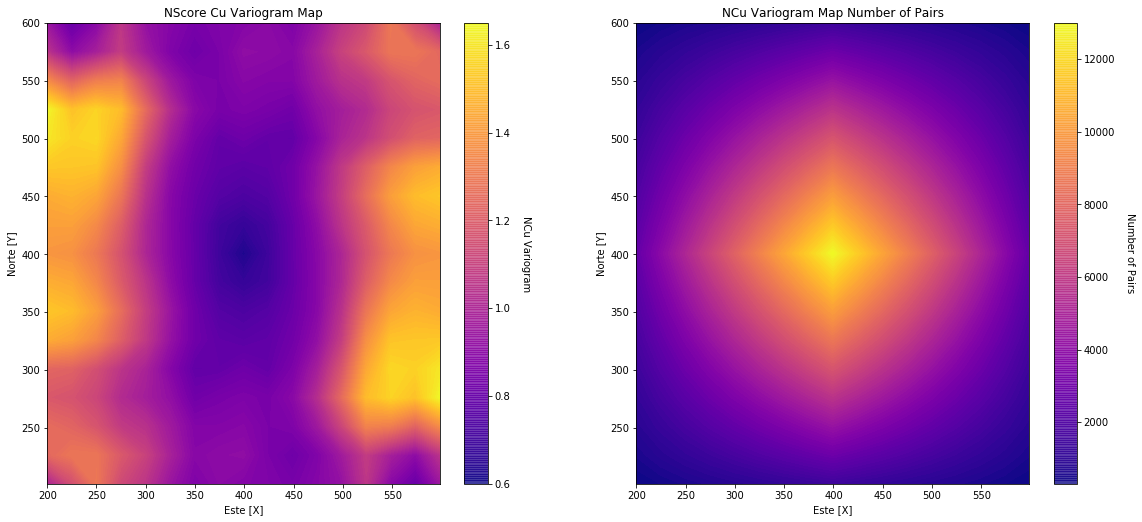

In [41]:
plt.subplot(121)
GSLIB.pixelplt_st(vmap,
                 200,
                 600,
                 200,
                 600,
                 24.9,
                 0.6,
                 1.65,
                 "NScore Cu Variogram Map",
                 "Este [X]",
                 "Norte [Y]",
                 "NCu Variogram",
                 plt.cm.plasma)
plt.subplot(122)
GSLIB.pixelplt_st(gamma,
                 200,
                 600,
                 200,
                 600,
                 24.9,
                 300.0,
                 13000,
                 "NCu Variogram Map Number of Pairs",
                 "Este [X]",
                 "Norte [Y]",
                 "Number of Pairs",
                 plt.cm.plasma)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.5, top=1.6, wspace=0.2, hspace=0.3)
plt.show()
print('The shape of the output is ' + str(vmap.shape))

The shape of the output is (17, 17)


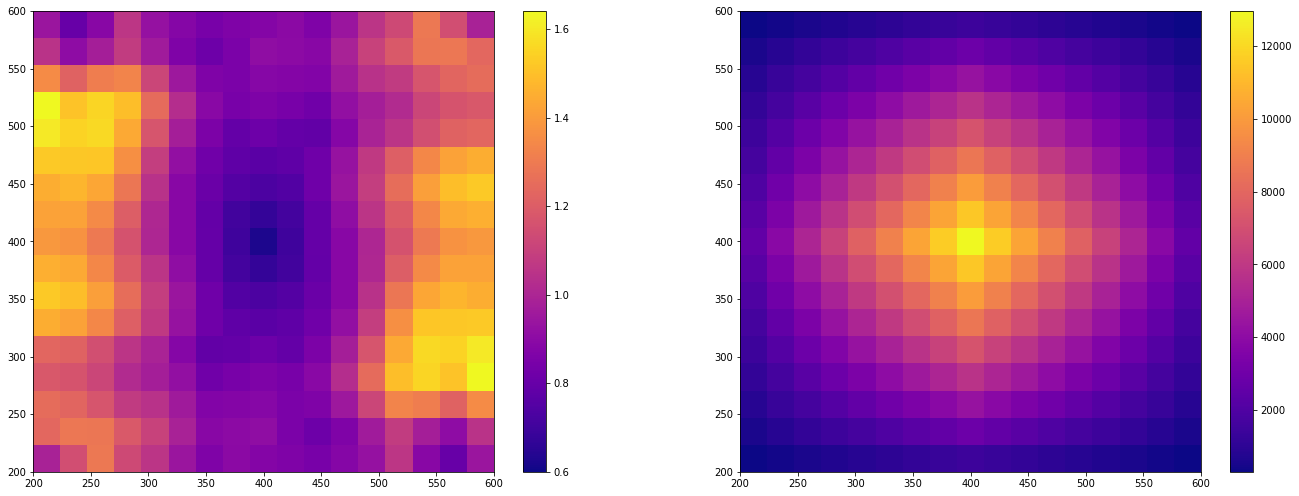

In [42]:
plt.subplot(121)
plt.imshow(vmap,cmap=plt.cm.plasma,extent=[200,600,200,600],vmin=0.6)
cbar = plt.colorbar()

plt.subplot(122)
plt.imshow(gamma,cmap=plt.cm.plasma, extent=[200,600,200,600],vmin=300)
cbar = plt.colorbar()

plt.subplots_adjust(left=0.0, bottom=0.0, right=3, top=1.6, wspace=0.2, hspace=0.3)
plt.show()

## 8.- Generación de estimación mediante Kriging Ordinario, obteniendo además varianza de estimación.

In [43]:
cu_vario_kri = GSLIB.make_variogram(nug=0.15,
                                 nst=1,
                                 it1=3,
                                 cc1=.85,
                                 azi1=0,
                                 hmaj1=300,
                                 hmin1=300) #ajuste a modelo variográfico para estimación con Kriging

In [44]:
geostats.kb2d

<function geostatspy.geostats.kb2d(df, xcol, ycol, vcol, tmin, tmax, nx, xmn, xsiz, ny, ymn, ysiz, nxdis, nydis, ndmin, ndmax, radius, ktype, skmean, vario)>

In [45]:
df.head()

,id sondaje,Este [X],Norte [Y],Cota [Z],N° muestras,Ley Cu [%],NCu
0,1,200,200,75,1,0.113597,-2.460124
1,1,200,200,80,2,0.402376,-1.640381
2,1,200,200,85,3,0.738256,-0.744653
3,1,200,200,90,4,0.788436,-0.615896
4,1,200,200,95,5,0.774902,-0.638500


In [46]:
cell_size = 10
nx = 100; ny = 100
xsiz = .10; ysiz = .10;
xmn = 5; ymn = 5
nxdis = 1; nydis = 1
ndmin = 0; ndmax = 50
radius = 5; ktype = 1
skmean = 45

tmin = -999; tmax = 999

cu_kmap, cu_vmap = geostats.kb2d(df,
                                 "Este [X]",
                                 "Norte [Y]", 
                                 "NCu",
                                 tmin = -999,
                                 tmax = 999,
                                 nx = 100,
                                 xmn = 5,
                                 xsiz = .5,
                                 ny = 100,
                                 ymn = 5,
                                 ysiz = .5,
                                 nxdis = 1,
                                 nydis = 1,
                                 ndmin = 0,
                                 ndmax = 999,
                                 radius = 200.0,
                                 ktype = 0,
                                 skmean = 1.11,
                                 vario = cu_vario_kri)

xmin = 200
ymin = 200
xmax = 600
ymax = 600

  Estimated   10000 blocks 
      average   0.2320777634441803  variance  0.0013017895102057295


In [47]:
GSLIB.kb2d

<function geostatspy.GSLIB.kb2d(df, xcol, ycol, vcol, nx, ny, hsiz, var, output_file)>

In [48]:
#cu_kmap, cu_vmap = GSLIB.kb2d(df, "Este [X]", "Norte [Y]", "NCu", 50, 50, 10, cu_vario_kri,"krig2d.csv")

In [49]:
np.min(cu_kmap)

0.16807119031103937

In [50]:
GSLIB.locpix_st

<function geostatspy.GSLIB.locpix_st(array, xmin, xmax, ymin, ymax, step, vmin, vmax, df, xcol, ycol, vcol, title, xlabel, ylabel, vlabel, cmap)>

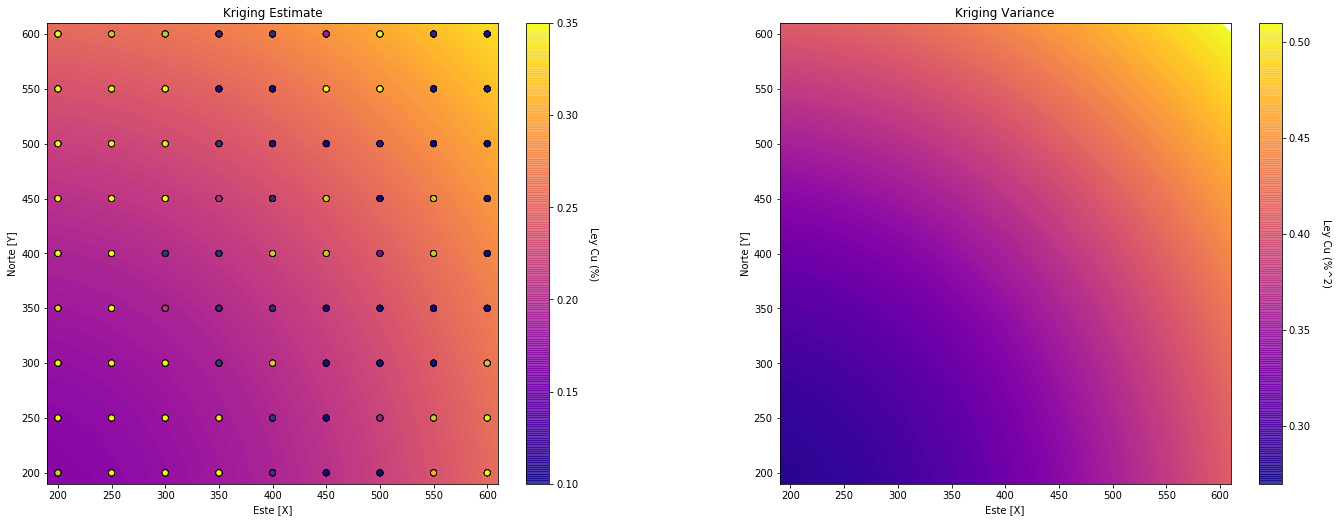

In [74]:
plt.subplot(121)
GSLIB.locpix_st(cu_kmap,
                xmin=190,
                xmax=610,
                ymin=190,
                ymax=610,
                step=4.24,
                vmin=.1,
                vmax=.35,
                df=df,
                xcol="Este [X]",
                ycol="Norte [Y]",
                vcol="NCu",
                title='Kriging Estimate',
                xlabel='Este [X]',
                ylabel='Norte [Y]',
                vlabel='Ley Cu (%)',
                cmap=plt.cm.plasma)
plt.subplot(122)
GSLIB.pixelplt_st(cu_vmap,
                  xmin=190,
                  xmax=610,
                  ymin=190,
                  ymax=610,
                  step=4.24,
                  vmin=0.27,
                  vmax=.51,
                  title='Kriging Variance',
                  xlabel='Este [X]',
                  ylabel='Norte [Y]',
                  vlabel="Ley Cu (%^2)",
                  cmap=plt.cm.plasma)
plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.6, wspace=0.3, hspace=0.2)
plt.show()

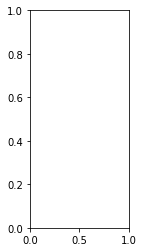

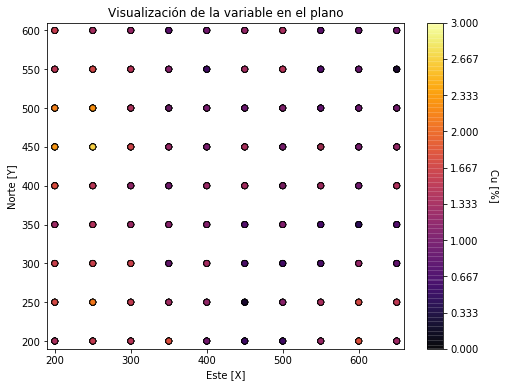

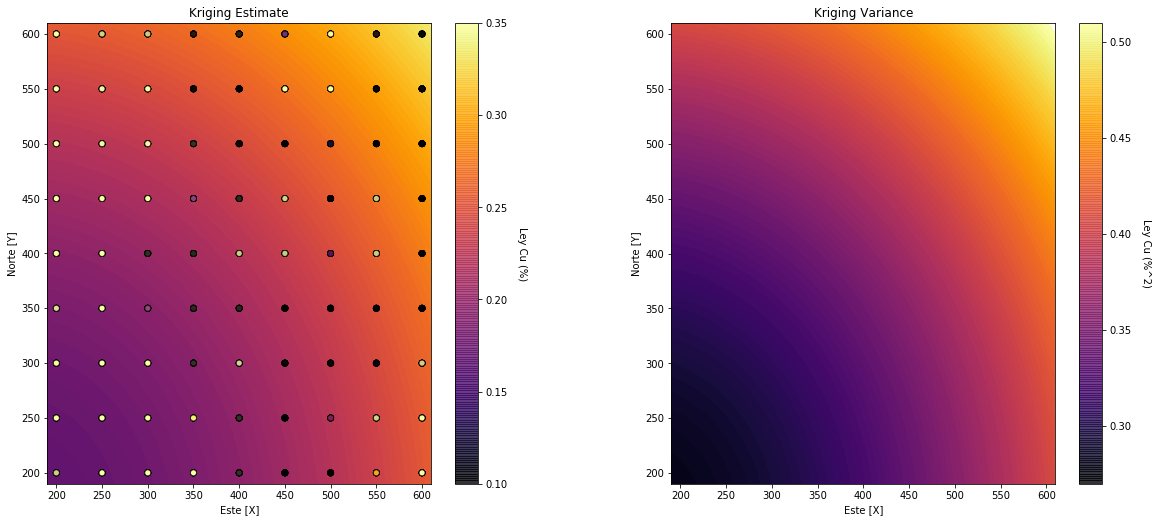

In [76]:
plt.subplot(131)
GSLIB.locmap(df, xcol="Este [X]",ycol="Norte [Y]",vcol="Ley Cu [%]",xmin=190,xmax=660,ymin=190,ymax=610,
             vmin=0,vmax=3,title="Visualización de la variable en el plano",
             xlabel="Este [X]",ylabel="Norte [Y]",vlabel="Cu [%]",cmap=cmap,fig_name="Var_")
plt.subplot(132)
GSLIB.locpix_st(cu_kmap,
                xmin=190,
                xmax=610,
                ymin=190,
                ymax=610,
                step=4.24,
                vmin=.1,
                vmax=.35,
                df=df,
                xcol="Este [X]",
                ycol="Norte [Y]",
                vcol="NCu",
                title='Kriging Estimate',
                xlabel='Este [X]',
                ylabel='Norte [Y]',
                vlabel='Ley Cu (%)',
                cmap=plt.cm.inferno)
plt.subplot(133)
GSLIB.pixelplt_st(cu_vmap,
                  xmin=190,
                  xmax=610,
                  ymin=190,
                  ymax=610,
                  step=4.24,
                  vmin=0.27,
                  vmax=.51,
                  title='Kriging Variance',
                  xlabel='Este [X]',
                  ylabel='Norte [Y]',
                  vlabel="Ley Cu (%^2)",
                  cmap=plt.cm.inferno)
plt.subplots_adjust(left=0.0, bottom=0.0, right=4.0, top=1.6, wspace=0.3, hspace=0.2)
plt.show()